In [1]:
#Importando o Pandas e as bases
import pandas as pd
treino = pd.read_csv('train.csv')
teste= pd.read_csv('test.csv')

In [2]:
#visualizando a base
treino.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
#visualizando informações
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#verificando a cardinalidade
treino.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Tratando os Dados
- Primeiro os dados Embarked

In [5]:
#Tratando os dados vazios de Embarked
treino.loc[treino.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- Pesquisando no Google, encontramos que as duas mulheres embarcaram no porto do Southampton

In [6]:
treino.loc[treino.Embarked.isnull(),'Embarked'] = 'S'

- Tratando os dados Age

In [7]:
treino.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
#Verificando se a media muda de acordo com o sexo
treino.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [9]:
##Verificando se a media muda de acordo com o sexo e com a classe contratada
media_idade=treino.groupby(['Sex','Pclass'])['Age'].mean()
media_idade

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [10]:
#Atribuindo a media das idades aos valores fazios de Age de acordo com o sexo e a classe
import numpy as np
#Para Mulheres
for i in range(3):
    treino.loc[(treino['Age'].isnull()) & (treino['Sex'] == 'female') & (treino['Pclass'] == (i+1)),'Age']= np.around(media_idade[i],0)
#Para Homens
for i in range(3):
     treino.loc[(treino['Age'].isnull()) & (treino['Sex'] == 'male') & (treino['Pclass'] == (i+1)),'Age']= np.around(media_idade[i],0)

In [11]:
#Verificando o restante das informações
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Verificando a coluna 'Cabin' se existe similaridade nos dados entre ela e PClass

In [12]:
treino['Cabin_Pclass'] = treino['Cabin'].str[0]

In [13]:
treino.groupby(['Pclass'])['Cabin_Pclass'].value_counts(dropna=False)

Pclass  Cabin_Pclass
1       C                59
        B                47
        NaN              40
        D                29
        E                25
        A                15
        T                 1
2       NaN             168
        F                 8
        D                 4
        E                 4
3       NaN             479
        F                 5
        G                 4
        E                 3
Name: Cabin_Pclass, dtype: int64

- Apagando a coluna 'Cabin' e 'Cabin_Pclass' porque representam praticamente a mesma informação

In [14]:
treino = treino.drop(['Cabin','Cabin_Pclass'],axis=1)

In [15]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


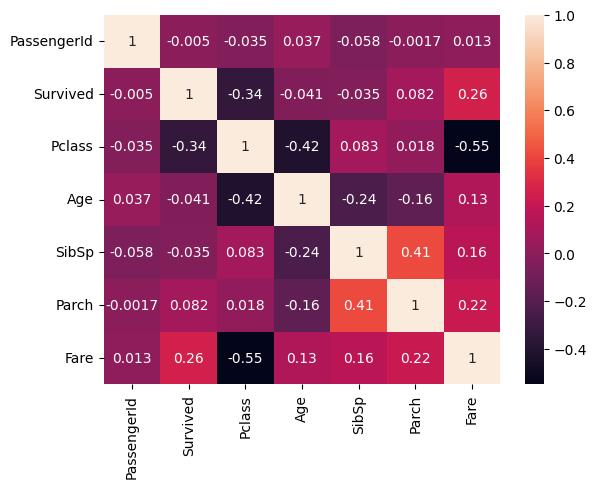

In [16]:
import seaborn as sns
sns.heatmap(treino.corr(),annot=True);

- Irei excluir também outras 3 colunas, 'Name', 'Ticket', 'Fare', Name e ticket por terem cardilanidade grande e 'Fare' ter uma correlação também com Pclass

In [17]:
treino = treino.drop(['Name','Ticket','Fare'],axis=1)

In [18]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


- Fazendo o tratamento dos dados de teste

In [19]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
media_idade_teste=treino.groupby(['Sex','Pclass'])['Age'].mean()
media_idade_teste
#Para Mulheres
for i in range(3):
    teste.loc[(teste['Age'].isnull()) & (teste['Sex'] == 'female') & (teste['Pclass'] == (i+1)),'Age']= np.around(media_idade_teste[i],0)
#Para Homens
for i in range(3):
     teste.loc[(teste['Age'].isnull()) & (teste['Sex'] == 'male') & (teste['Pclass'] == (i+1)),'Age']= np.around(media_idade_teste[i],0)

In [21]:
teste = teste.drop(['Name','Ticket','Fare','Cabin'],axis=1)

In [22]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 23.0+ KB


## Fazendo uma submissão com esses dados para fazer uma verificação antes de tratar as colunas de texto.

In [23]:
# Selecionando apenas as colunas numéricas
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr[cols_nr != 'Survived']

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch'], dtype='object')

In [24]:
#Quantas colunas irão para o modelo (treino)
treino2 = treino.loc[:,cols_nr]
treino2.shape

(891, 6)

In [25]:
#Quantas colunas irão para o modelo (teste)
teste2 = teste.loc[:,cols_nr[cols_nr != 'Survived']]
teste2.shape

(418, 5)

In [26]:
# Selecionando X e y
X = treino2.drop('Survived',axis=1)
y = treino2.Survived

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
# Criando o regressor e fazendo o fit com os dados de treino
reg_rf = RandomForestClassifier(random_state=42)
reg_rf.fit(X_train, y_train)
# Fazendo a previsão
y_pred_rf = reg_rf.predict(X_test)

In [29]:
from sklearn import svm
clf_SVM = svm.SVC()
clf_SVM.fit(X_train, y_train)
y_pred_SVM=clf_SVM.predict(X_test)

In [30]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X, y)
y_pred_tree=clf_tree.predict(X_test)

In [31]:
#Importando o confusion_matrix para verificar os dados
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[145,  30],
       [ 58,  62]], dtype=int64)

In [32]:
confusion_matrix(y_test, y_pred_SVM)

array([[175,   0],
       [120,   0]], dtype=int64)

In [33]:
confusion_matrix(y_test, y_pred_tree)

array([[175,   0],
       [  0, 120]], dtype=int64)

In [34]:
#Utilizando a arvore de decisão pois foi quem teve o melhor resultado
y_pred_teste=clf_tree.predict(teste2)

In [35]:
teste2['Survived'] = y_pred_teste

In [36]:
base_kaggle = teste2[['PassengerId','Survived']]
base_kaggle.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1


In [37]:
base_kaggle.to_csv('resultadoT1.csv',index=False)

#### Sem o tratamentodas colunas de 'Sex' e 'Embarked' consegui prever  corretamente **63,39% dos dados**.

## Tratando as colunas de texto

In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [39]:
ohe=ohe.fit(treino[['Embarked']])
ohe.transform(treino[['Embarked']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [40]:
ohe_df=pd.DataFrame(ohe.transform(treino[['Embarked']]).toarray())

In [41]:
ohe_df.columns=ohe.get_feature_names_out()
ohe_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0


In [42]:
treino3=pd.concat([treino,ohe_df],axis=1)
treino3.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,S,0.0,0.0,1.0
1,2,1,1,female,38.0,1,0,C,1.0,0.0,0.0
2,3,1,3,female,26.0,0,0,S,0.0,0.0,1.0


In [43]:
treino3=treino3.drop('Embarked',axis=1)

- Tratando a coluna 'Sex'

In [44]:
treino3['Is_Male']=treino3.Sex.apply(lambda X: 1 if X=='male' else 0)
treino3=treino3.drop('Sex',axis=1)

In [45]:
treino3.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Is_Male
0,1,0,3,22.0,1,0,0.0,0.0,1.0,1
1,2,1,1,38.0,1,0,1.0,0.0,0.0,0
2,3,1,3,26.0,0,0,0.0,0.0,1.0,0


### Aplicando para a base de teste

In [46]:
ohe=ohe.fit(teste[['Embarked']])
ohe.transform(teste[['Embarked']]).toarray()
ohe_df_teste=pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray())
ohe_df_teste.columns=ohe.get_feature_names_out()
teste3=pd.concat([teste,ohe_df_teste],axis=1)
teste3.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,Q,0.0,1.0,0.0
1,893,3,female,47.0,1,0,S,0.0,0.0,1.0
2,894,2,male,62.0,0,0,Q,0.0,1.0,0.0


In [47]:
teste3['Is_Male']=teste3.Sex.apply(lambda X: 1 if X=='male' else 0)
teste3=teste3.drop(['Sex','Embarked'],axis=1)
teste3.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Is_Male
0,892,3,34.5,0,0,0.0,1.0,0.0,1
1,893,3,47.0,1,0,0.0,0.0,1.0,0
2,894,2,62.0,0,0,0.0,1.0,0.0,1


## Refazendo o modelo

In [48]:
#testando inicialmente nos 3 primeiros modelos
teste_consulta=teste3
X = treino3.drop('Survived',axis=1)
y = treino3.Survived

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rf = RandomForestClassifier(random_state=42)
reg_rf.fit(X_train, y_train)
# Fazendo a previsão
y_pred_rf = reg_rf.predict(X_test)

In [51]:
from sklearn import svm
clf_SVM = svm.SVC()
clf_SVM.fit(X_train, y_train)
y_pred_SVM=clf_SVM.predict(X_test)

In [52]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(X, y)
y_pred_tree=clf_tree.predict(X_test)

In [53]:
print(f'Random Forest \n {confusion_matrix(y_test, y_pred_rf)}')
print(f'SVM \n {confusion_matrix(y_test, y_pred_SVM)}')
print(f'Decision Tree \n {confusion_matrix(y_test, y_pred_tree)}')

Random Forest 
 [[160  15]
 [ 38  82]]
SVM 
 [[175   0]
 [120   0]]
Decision Tree 
 [[175   0]
 [  0 120]]


In [54]:
teste3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Embarked_C   418 non-null    float64
 6   Embarked_Q   418 non-null    float64
 7   Embarked_S   418 non-null    float64
 8   Is_Male      418 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 29.5 KB


In [55]:
y_pred_teste=clf_tree.predict(teste3)

In [56]:
teste3['Survived'] = y_pred_teste
base_kaggle = teste3[['PassengerId','Survived']]
base_kaggle.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [57]:
base_kaggle.to_csv('resultadoT2.csv',index=False)

- Submetendo essa base no Kaggle consegui um **Score de 66,5%**.

### Testando outro modelo

In [58]:
import xgboost as xgb

In [59]:
teste4=teste_consulta.drop('Survived',axis=1)

In [60]:
reg = xgb.XGBClassifier()

In [61]:
reg=reg.fit(X_train, y_train)

In [62]:
y_pred_xgb = reg.predict(teste4)
y_pred_xgb

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [63]:
teste4['Survived'] = y_pred_xgb
base_kaggle = teste4[['PassengerId','Survived']]
base_kaggle.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [64]:
base_kaggle.to_csv('resultadoT4.csv',index=False)

- Submetendo essa base no Kaggle consegui um **Score de 77,99%** (melhorando o modelo em **11,49%!**)

### Testando outro modelo

In [65]:
teste5=teste_consulta.drop('Survived',axis=1)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
clf_knn = KNeighborsClassifier(n_neighbors=1,p=1).fit(X_train, y_train)

In [68]:
y_pred_knn = clf_knn.predict(teste5)

In [69]:
y_pred_knn

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [70]:
teste5['Survived'] = y_pred_knn
base_kaggle = teste5[['PassengerId','Survived']]
base_kaggle.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1


In [71]:
base_kaggle.to_csv('resultadoT5.csv',index=False)

- Submetendo essa base no Kaggle consegui um **Score de 63,15%** piorando o modelo